# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [186]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [187]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [188]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [189]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [190]:
# Extract all rows of data
table_rows =html_soup.find_all('tr')

In [191]:
# Create an empty list
res = []
# Loop through the scraped data to create a list of rows
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [192]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

df_scrape = pd.DataFrame(res, columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure'])
print(df_scrape)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [193]:
#Create df with pandas read 

df_pandas = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html',header=0)
for df in df_pandas:
    print(df_pandas)

[        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [194]:
# Examine data type of each column
df_scrape.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [195]:
# Change data types for data analysis
df_scrape['id']=df['id'].astype(int)
df_scrape['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df_scrape['sol']=df['sol'].astype(int)
df_scrape['ls']=df['ls'].astype(int)
df_scrape['month']=df['month'].astype(int)
df_scrape['min_temp']=df['min_temp'].astype(float)
df_scrape['pressure']=df['pressure'].astype(float)


In [196]:
# Confirm type changes were successful by examining data types again
df_scrape.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [197]:
# 1. How many months are there on Mars?
months=df_scrape['month'].nunique()
print(f'There are', months ,'months on Mars.')

There are 12 months on Mars.


In [198]:
# 2. How many Martian days' worth of data are there?
days=df_scrape['sol'].nunique()
print(f'There are', days ,'Martian days.')

There are 1867 Martian days.


In [204]:
# 3. What is the average low temperature by month?
low_temps_df= df_scrape.groupby('month')['min_temp'].mean()
low_temps_df= low_temps_df.reset_index(name='min_temp')
low_temps_df


,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


<AxesSubplot:title={'center':'Average Tempurature by Month'}, xlabel='month'>

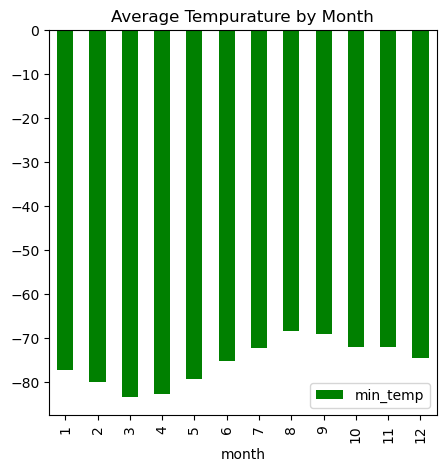

In [205]:
# Plot the average temperature by month
low_temps_df.plot(kind="bar", y="min_temp", x="month", figsize=(5,5), color='green',
              title="Average Tempurature by Month")


In [206]:
# Identify the coldest months in Curiosity's location
coldest_df= low_temps_df['min_temp'].min()
month_coldest=low_temps_df.loc[low_temps_df['min_temp']==coldest_df]
month_coldest


,month,min_temp
2,3,-83.307292


In [207]:
# Identify the hottest months in Curiosity's location
hottest_df= low_temps_df['min_temp'].max()
month_hottest=low_temps_df.loc[low_temps_df['min_temp']==hottest_df]
month_hottest

,month,min_temp
7,8,-68.382979


In [208]:
# 4. Average pressure by Martian month
pressure_df= df_scrape.groupby('month')['pressure'].mean()
pressure_df= pressure_df.reset_index(name='pressure')
pressure_df
     

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


<AxesSubplot:title={'center':'Average Pressure by Month'}, xlabel='month'>

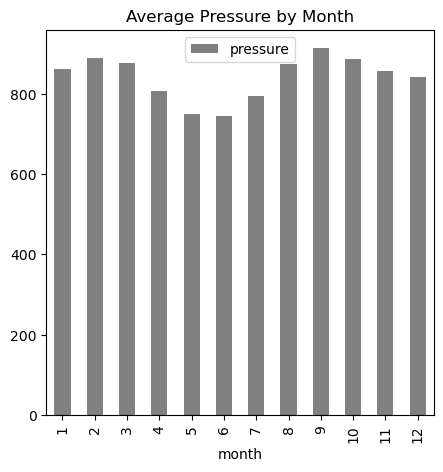

In [209]:
# Plot the average pressure by month
pressure_df.plot(kind="bar", y="pressure", x="month", figsize=(5,5), color='gray',
              title="Average Pressure by Month")

In [210]:
# Identify the lowest pressure months
lowest_df= pressure_df['pressure'].min()
month_lowest=pressure_df.loc[pressure_df['pressure']==lowest_df]
month_lowest

,month,pressure
5,6,745.054422


In [211]:
# Identify the lowest pressure months
highest_df= pressure_df['pressure'].max()
month_highest=pressure_df.loc[pressure_df['pressure']==highest_df]
month_highest


,month,pressure
8,9,913.30597


In [215]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#  first solar longitude
x = df_scrape["ls"].loc[0]

#  longitude to determine a martian year
long = df_scrape.loc[df_scrape["ls"] == x]

# solar dates
first = long["terrestrial_date"].iloc[0]
second = long["terrestrial_date"].iloc[1]
# get the different date in between second lon and first lon date
diference  = second - first

# print the result
print(f" {diference} Earth days are in a Martian Day")


 686 days 00:00:00 Earth days are in a Martian Day


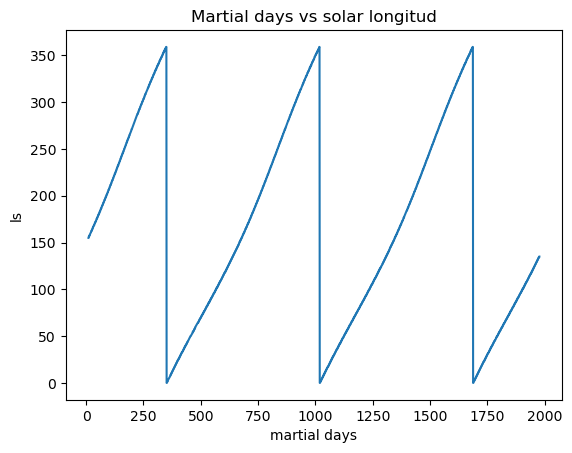

In [225]:
plt.plot(df_scrape['sol'],df_scrape['ls'])
plt.xlabel("martial days")
plt.ylabel("ls")
plt.title('Martial days vs solar longitud')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [226]:
# Write the data to a CSV
df_scrape.to_csv('mars_table.csv',index=False)

In [227]:
browser.quit()